In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Load original datasets
data_10 = pd.read_csv('../../data/dataset/feature_selection/data_encoded_10_features.csv')
data_20 = pd.read_csv('../../data/dataset/feature_selection/data_encoded_20_features.csv')
data_37 = pd.read_csv('../../data/dataset/feature_selection/data_encoded_37_features.csv')

In [71]:
#features and target separated for original datasets
X_10, y_10 = data_10.drop(columns=['HeartDisease_Yes']), data_10['HeartDisease_Yes']
X_20, y_20 = data_20.drop(columns=['HeartDisease_Yes']), data_20['HeartDisease_Yes']
X_37, y_37 = data_37.drop(columns=['HeartDisease_Yes']), data_37['HeartDisease_Yes']

In [73]:
# each dataset split into training and testing sets
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.2, random_state=42)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_20, y_20, test_size=0.2, random_state=42)
X_train_37, X_test_37, y_train_37, y_test_37 = train_test_split(X_37, y_37, test_size=0.2, random_state=42)

In [75]:

# Initialize separate RandomForestClassifier instances for each feature set
rf_clf_10 = RandomForestClassifier(random_state=42)
rf_clf_20 = RandomForestClassifier(random_state=42)
rf_clf_37 = RandomForestClassifier(random_state=42)

# Train each classifier on the respective training set
rf_clf_10.fit(X_train_10, y_train_10)
rf_clf_20.fit(X_train_20, y_train_20)
rf_clf_37.fit(X_train_37, y_train_37)


RandomForestClassifier(random_state=42)

In [76]:
# Predictions for each dataset
y_pred_10 = rf_clf_10.predict(X_test_10)
y_pred_20 = rf_clf_20.predict(X_test_20)
y_pred_37 = rf_clf_37.predict(X_test_37)

In [79]:
# Calculate performance metrics
metrics = {}
for name, y_test, y_pred, rf_clf, X_train, y_train in [
    ("10 Features", y_test_10, y_pred_10, rf_clf_10, X_train_10, y_train_10),
    ("20 Features", y_test_20, y_pred_20, rf_clf_20, X_train_20, y_train_20),
    ("37 Features", y_test_37, y_pred_37, rf_clf_37, X_train_37, y_train_37)
]:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Cross-validate for ROC and AUC
    y_scores = cross_val_predict( rf_clf, X_train, y_train, cv=3, method="predict_proba")[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_scores)
    auc = roc_auc_score(y_train, y_scores)
    
    # Store the results
    metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc,
        "y_test": y_test,
        "y_pred": y_pred
    }
    metrics[name]["fpr"] = fpr
    metrics[name]["tpr"] = tpr

# Print results
for dataset, metric_values in metrics.items():
    print(f"\nResults for {dataset} Dataset:")
    for metric, value in metric_values.items():
        if metric in ["fpr", "tpr", "y_test", "y_pred"]:
            continue
        print(f"{metric}: {value:.2f}")


Results for 10 Features Dataset:
Accuracy: 0.91
Precision: 0.43
Recall: 0.08
F1-Score: 0.13
AUC: 0.77

Results for 20 Features Dataset:
Accuracy: 0.90
Precision: 0.38
Recall: 0.12
F1-Score: 0.18
AUC: 0.78

Results for 37 Features Dataset:
Accuracy: 0.90
Precision: 0.31
Recall: 0.12
F1-Score: 0.17
AUC: 0.79


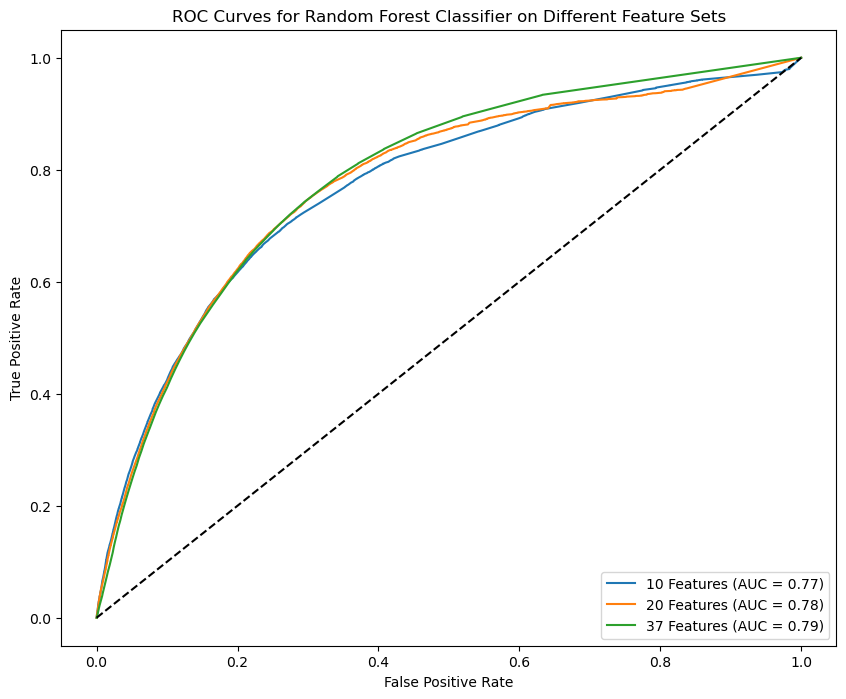

In [81]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))
for dataset, values in metrics.items():
    plt.plot(values["fpr"], values["tpr"], label=f"{dataset} (AUC = {values['AUC']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest Classifier on Different Feature Sets')
plt.legend(loc="lower right")
plt.show()

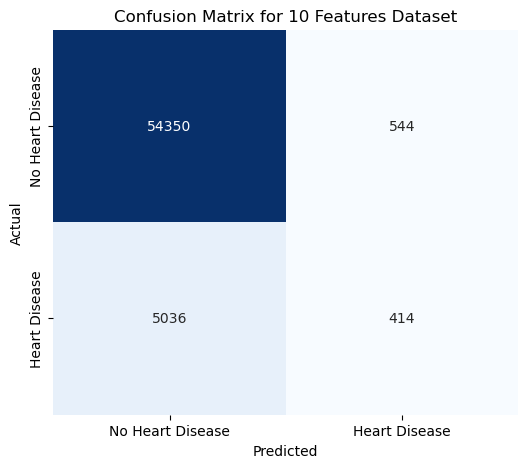

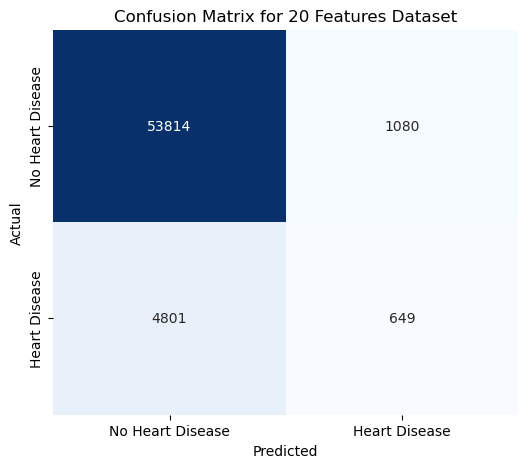

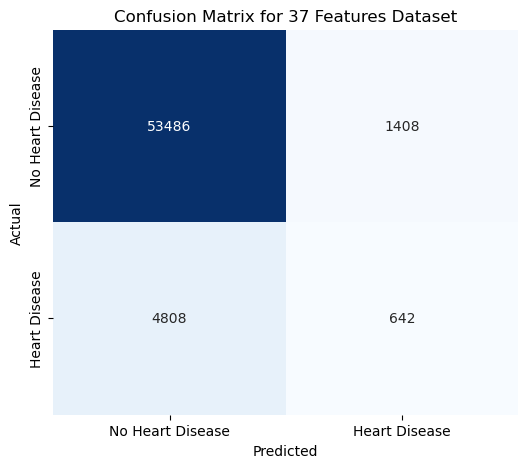

In [83]:
# Confusion Matrices
for dataset, values in metrics.items():
    cm = confusion_matrix(values["y_test"], values["y_pred"])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Heart Disease', 'Heart Disease'],
                yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {dataset} Dataset')
    plt.show()

In [85]:
# Load undersampled datasets
data_resample_10 = pd.read_csv('C:/Users/raiqa/github/Dubai_UG-16/data/dataset/feature_selection/resample_encoded_10_features.csv')
data_resample_20 = pd.read_csv('C:/Users/raiqa/github/Dubai_UG-16/data/dataset/feature_selection/resample_encoded_20_features.csv')
data_resample_37 = pd.read_csv('C:/Users/raiqa/github/Dubai_UG-16/data/dataset/feature_selection/resample_encoded_37_features.csv')

In [87]:
#features and target separated for each undersampled dataset
X_resample_10, y_resample_10 = data_resample_10.drop(columns=['HeartDisease_Yes']), data_resample_10['HeartDisease_Yes']
X_resample_20, y_resample_20 = data_resample_20.drop(columns=['HeartDisease_Yes']), data_resample_20['HeartDisease_Yes']
X_resample_37, y_resample_37 = data_resample_37.drop(columns=['HeartDisease_Yes']), data_resample_37['HeartDisease_Yes']

In [89]:
# each undersampled dataset split  into training and testing sets
X_train_resample_10, X_test_resample_10, y_train_resample_10, y_test_resample_10 = train_test_split(X_resample_10, y_resample_10, test_size=0.2, random_state=42)
X_train_resample_20, X_test_resample_20, y_train_resample_20, y_test_resample_20 = train_test_split(X_resample_20, y_resample_20, test_size=0.2, random_state=42)
X_train_resample_37, X_test_resample_37, y_train_resample_37, y_test_resample_37 = train_test_split(X_resample_37, y_resample_37, test_size=0.2, random_state=42)

In [91]:

# Initialize separate RandomForestClassifier instances for each feature set
rf_clf_10_resample = RandomForestClassifier(random_state=42)
rf_clf_20_resample = RandomForestClassifier(random_state=42)
rf_clf_37_resample = RandomForestClassifier(random_state=42)

# Train each classifier on the respective training set
rf_clf_10_resample.fit(X_train_resample_10, y_train_resample_10)
rf_clf_20_resample.fit(X_train_resample_20, y_train_resample_20)
rf_clf_37_resample.fit(X_train_resample_37, y_train_resample_37)


RandomForestClassifier(random_state=42)

In [93]:
# Predictions for each undersampled dataset
y_pred_resample_10 = rf_clf_10_resample.predict(X_test_resample_10)
y_pred_resample_20 = rf_clf_20_resample.predict(X_test_resample_20)
y_pred_resample_37 = rf_clf_37_resample.predict(X_test_resample_37)

In [95]:
# Calculate performance metrics
metrics = {}
for name, y_test, y_pred, rf_clf, X_train, y_train in [
    ("10 Features", y_test_resample_10, y_pred_resample_10, rf_clf_10_resample, X_train_resample_10, y_train_resample_10),
    ("20 Features", y_test_resample_20, y_pred_resample_20, rf_clf_20_resample, X_train_resample_20, y_train_resample_20),
    ("37 Features", y_test_resample_37, y_pred_resample_37, rf_clf_37_resample, X_train_resample_37, y_train_resample_37)
]:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Cross-validate for ROC and AUC
    y_scores = cross_val_predict(rf_clf, X_train, y_train, cv=3, method="predict_proba")[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_scores)
    auc = roc_auc_score(y_train, y_scores)
    
    # Store the results
    metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc,
        "y_test": y_test,
        "y_pred": y_pred
    }
    metrics[name]["fpr"] = fpr
    metrics[name]["tpr"] = tpr

# Print results
for dataset, metric_values in metrics.items():
    print(f"\nResults for {dataset} Dataset (Undersampled):")
    for metric, value in metric_values.items():
        if metric in ["fpr", "tpr", "y_test", "y_pred"]:
            continue
        print(f"{metric}: {value:.2f}")


Results for 10 Features Dataset (Undersampled):
Accuracy: 0.71
Precision: 0.72
Recall: 0.68
F1-Score: 0.70
AUC: 0.77

Results for 20 Features Dataset (Undersampled):
Accuracy: 0.73
Precision: 0.72
Recall: 0.77
F1-Score: 0.74
AUC: 0.80

Results for 37 Features Dataset (Undersampled):
Accuracy: 0.73
Precision: 0.72
Recall: 0.77
F1-Score: 0.74
AUC: 0.80


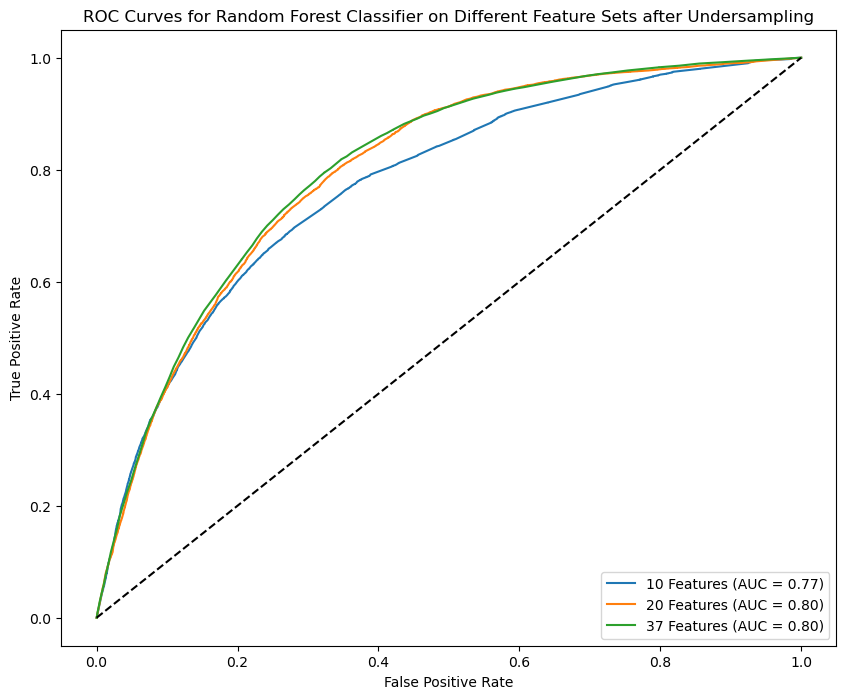

In [97]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))
for dataset, values in metrics.items():
    plt.plot(values["fpr"], values["tpr"], label=f"{dataset} (AUC = {values['AUC']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest Classifier on Different Feature Sets after Undersampling')
plt.legend(loc="lower right")
plt.show()

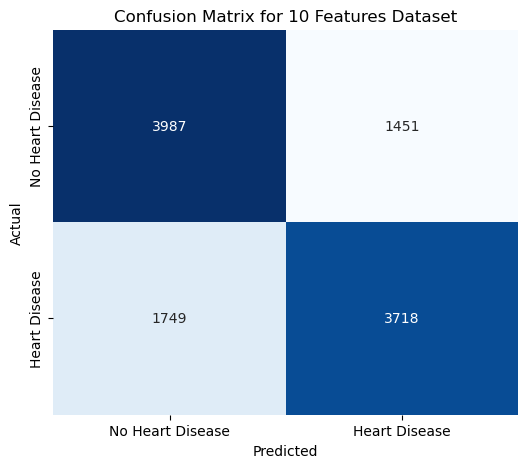

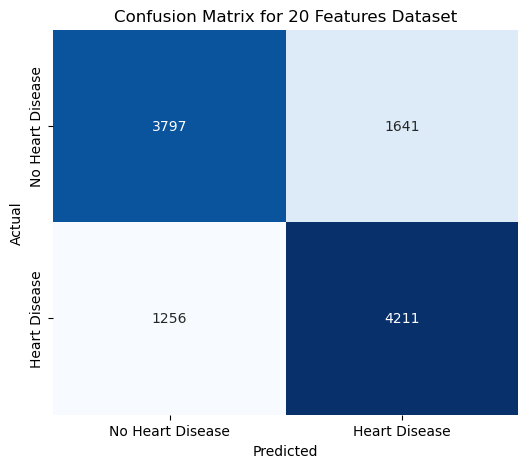

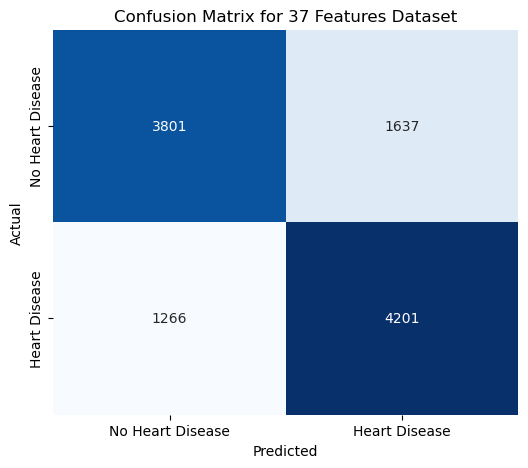

In [99]:
# Confusion Matrices
for dataset, values in metrics.items():
    cm = confusion_matrix(values["y_test"], values["y_pred"])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Heart Disease', 'Heart Disease'],
                yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {dataset} Dataset')
    plt.show()